# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from matplotlib.patches import Patch

# Set constants

In [2]:
# set figure details
figsize = (10, 10)
dpi = 200

# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "performance_per_singular_case_vs_control.svg"

# Load data

In [3]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])
phenotype = pd.read_csv(os.path.join(config.CLEAN_DIR, "phenotype.csv"), index_col=[0, 1])
GMHI2_scores_cv = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI2_scores_cv.csv"), index_col=[0, 1])
display(X.head())
display(y.head())
display(GMHI2_scores_cv.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-10  SAMN03283239        0.000000                     0.000000   
         SAMN03283266        0.000000                     0.000000   
         SAMN03283281        0.009764                     0.009764   
         SAMN03283245        0.106067                     0.106067   
         SAMN03283294        0.000000                     0.000000   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-10  SAMN03283239                                            0.000000   
         SAMN03283266                                            0.000000   
         SAMN03283281                                            0.009764   
         SAMN03283245                                            0.106067   
         SAMN03283294                                            0.000000   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-10  SAMN03283239                                               0.000000                      
         SAMN03283266                                               0.000000                      
         SAMN03283281                                               0.009764                      
         SAMN03283245                                               0.106067                      
         SAMN03283294                                               0.000000                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-10  SAMN03283239                                               0.000000                                             
         SAMN03283266                                               0.000000                                             
         SAMN03283281                                               0.009764                                             
         SAMN03283245                                               0.106067                                             
         SAMN03283294                                               0.000000                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-10  SAMN03283239                                               0.000000                                                                   
         SAMN03283266                                               0.000000                                                                   
         SAMN03283281                                               0.009764                                                                   
         SAMN03283245                                               0.072453                                                                   
         SAMN03283294                                               0.000000                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-10  SAMN03283239                                               0.000000              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283245                              True
         SAMN03283294                              True

GMHI2_cv
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.876379
         SAMN03283266      0.273884
         SAMN03283281      0.942891
         SAMN03283245      1.152237
         SAMN03283294      2.140906

In [4]:
studies = np.unique(X.index.get_level_values(0))
studies

array(['GMHI-10', 'GMHI-11', 'GMHI-13', 'GMHI-14', 'GMHI-15', 'GMHI-17',
       'GMHI-2', 'GMHI-21', 'GMHI-23', 'GMHI-24', 'GMHI-26', 'GMHI-27',
       'GMHI-28', 'GMHI-3', 'GMHI-31', 'GMHI-32', 'GMHI-33', 'GMHI-4',
       'GMHI-5', 'GMHI-9', 'GMHI-V-35', 'GMHI-V-36', 'GMHI-V-38',
       'GMHI-V-40', 'GMHI-V-41', 'P11', 'P110', 'P121', 'P132', 'P135',
       'P140', 'P15', 'P17', 'P2', 'P21', 'P24', 'P32', 'P34', 'P39',
       'P48', 'P53', 'P56', 'P57', 'P69', 'P74', 'P77', 'P8', 'P80',
       'P81', 'P87', 'P88', 'P89', 'P9', 'P94', 'P95', 'P96', 'P98'],
      dtype=object)

In [5]:
info = pd.DataFrame((GMHI2_scores_cv > 0).values, index=GMHI2_scores_cv.index, columns=["predicted"])
info["phenotype"] = phenotype
info["y"] = y


# remove samples with low GMHI2 score magnitudes
cutoff = 1
info = info[(abs(GMHI2_scores_cv) >= cutoff).values]
info

predicted phenotype     y
Study_ID Sample Accession                           
GMHI-10  SAMN03283239           True   Healthy  True
         SAMN03283245           True   Healthy  True
         SAMN03283294           True   Healthy  True
         SAMN03283288           True   Healthy  True
         SAMN03283260           True   Healthy  True
...                              ...       ...   ...
P98      SAMEA6104861           True   Healthy  True
         SAMEA6104856           True   Healthy  True
         SAMEA6104855           True   Healthy  True
         SAMEA6104859          False   Healthy  True
         SAMEA6104853          False   Healthy  True

[4422 rows x 3 columns]

In [6]:
dicts = []
for study in studies:
    study_df = info.loc[study] 
    study_phenotypes = np.unique(study_df["phenotype"])
    
    # only evaluate case control studies
    if study_phenotypes.shape[0] != 2 or "Healthy" not in study_phenotypes:
        continue
        
    case_phenotype = study_phenotypes[0] if study_phenotypes[0] != "Healthy" else study_phenotypes[1]
        
    precision_control = precision_score(study_df["y"], study_df["predicted"])    
    recall_control = recall_score(study_df["y"], study_df["predicted"])    
        
    precision_case = precision_score(~study_df["y"], ~study_df["predicted"])    
    recall_case = recall_score(~study_df["y"], ~study_df["predicted"])    
    
    dicts.append({
        "study_and_phenotype" : f"{study} Healthy",  
        "precision" : precision_control,
        "recall" : recall_control
    })

    dicts.append({
        "study_and_phenotype" : f"{study} {case_phenotype}",  
        "precision" : precision_case,
        "recall" : recall_case,
    })


/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
df = pd.DataFrame(dicts)
df = df.set_index("study_and_phenotype")
df

,precision,recall
study_and_phenotype,,
GMHI-11 Healthy,0.409091,0.900000
GMHI-11 Colorectal adenoma,0.965517,0.682927
GMHI-17 Healthy,0.400000,0.240000
GMHI-17 Rheumatoid arthritis,0.683333,0.820000
GMHI-2 Healthy,0.750000,0.053571
GMHI-2 Atherosclerotic cardiovascular disease,0.761261,0.994118
GMHI-21 Healthy,0.400000,0.250000
GMHI-21 Hypertension,0.739130,0.850000
GMHI-23 Healthy,0.611111,0.916667


In [8]:
colors = [healthy_color, nonhealthy_color] * (df.shape[0] // 2)

In [9]:
# print out average precision and recall for control and case
healthy_idx = np.array(["Healthy" in ind for ind in df.index])
control = df.iloc[healthy_idx]
case = df.iloc[~healthy_idx]
means = pd.concat([control.mean(), case.mean()], axis=1)
means.columns = ["control", "case"]
means

,control,case
precision,0.625041,0.762589
recall,0.409006,0.859777


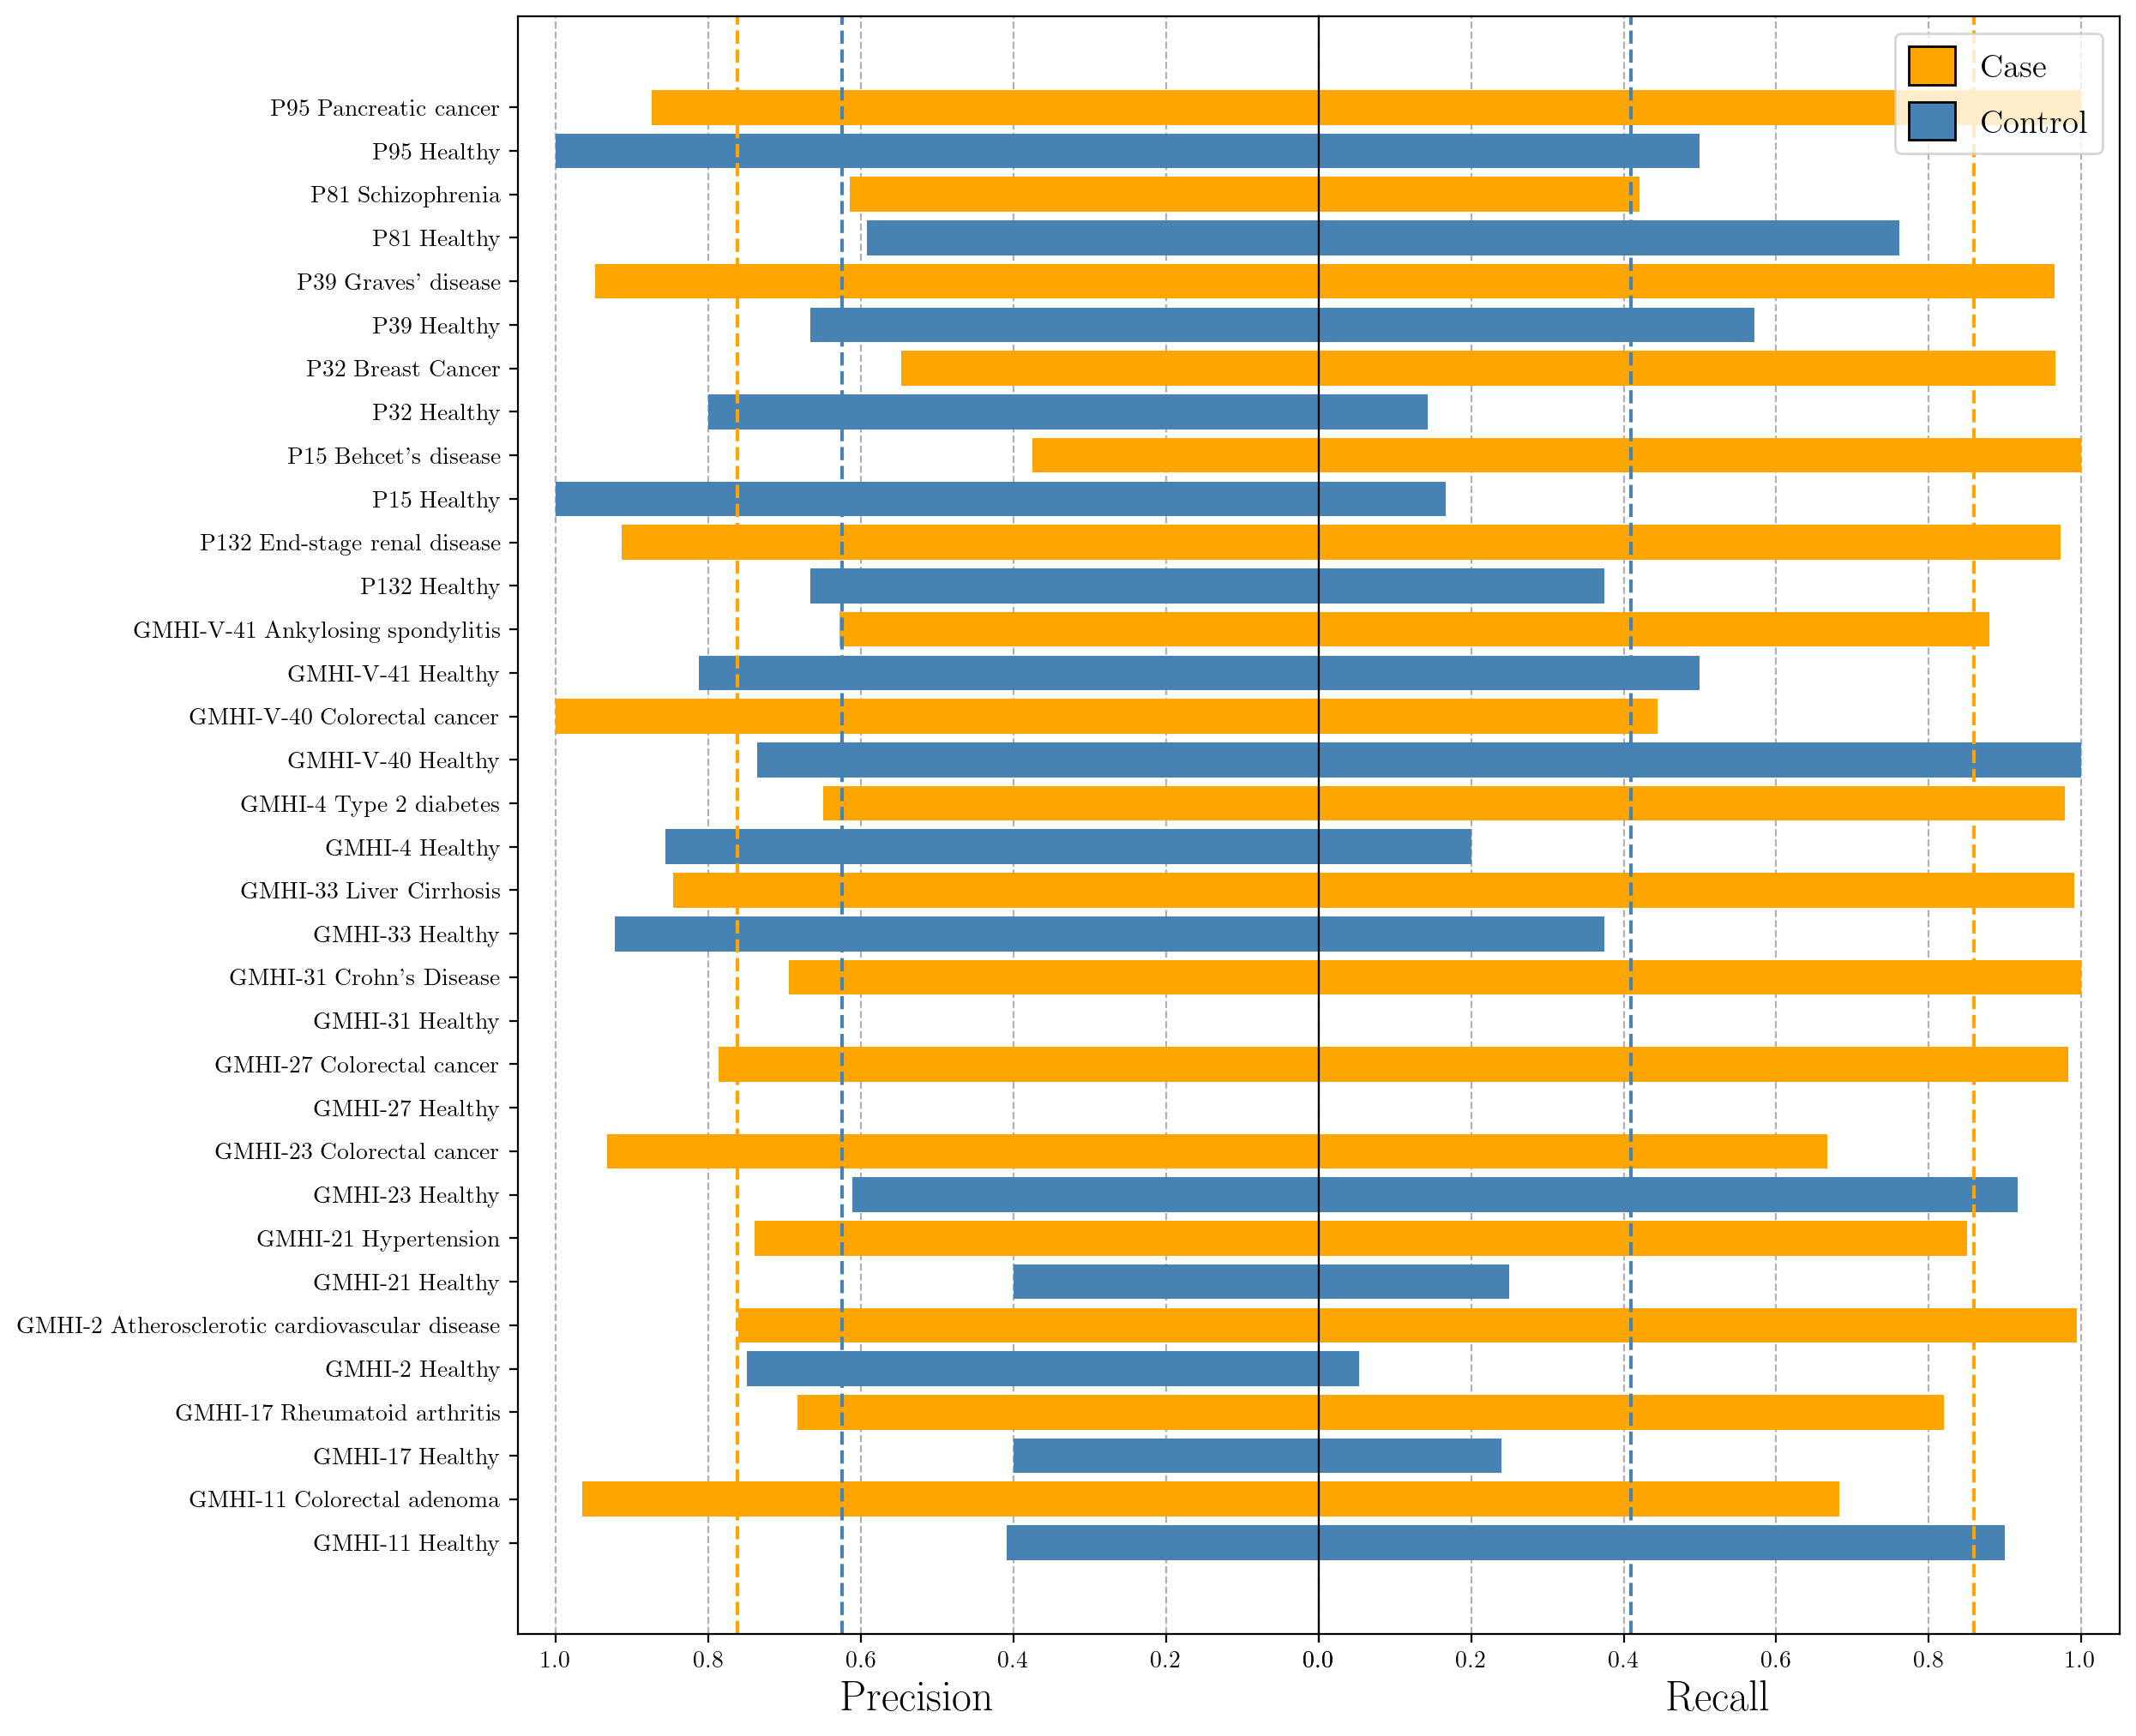

In [10]:
fig, axes = plt.subplots(figsize=figsize, ncols=2, sharey=True, dpi=dpi)

fig.tight_layout()

axes[0].barh(df.index, df["precision"], align='center', color=colors)
axes[0].set_xlabel("Precision", fontsize=18)
axes[0].invert_xaxis() 

axes[1].barh(df.index, df["recall"], align='center', color=colors)
axes[1].set_xlabel("Recall", fontsize=18)
axes[1].tick_params(left=False)

for ax in axes:
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="x")
    
handles = [
    Patch(facecolor=nonhealthy_color, edgecolor="k", label="Case", alpha=1),
    Patch(facecolor=healthy_color, edgecolor="k", label="Control", alpha=1),
]

# draw mean lines
axes[0].axvline(means["control"].loc["precision"], linestyle="--", c=healthy_color)
axes[0].axvline(means["case"].loc["precision"], linestyle="--", c=nonhealthy_color)
axes[1].axvline(means["control"].loc["recall"], linestyle="--", c=healthy_color)
axes[1].axvline(means["case"].loc["recall"], linestyle="--", c=nonhealthy_color)


plt.legend(handles=handles, prop={'size': 14}, loc=0, handlelength=1.4, handleheight=1.4)

plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(config.FIGURE_DIR, filename), bbox_inches='tight')